# Sergio Camposortega
## Insulete Challenge

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import plot_partial_dependence
import shap

import pickle

Your goal is to train a model on training.csv that will predict values for the variable called "target" on the test data

### Type of problem: Regression

First let's read the data

In [2]:
train =  pd.read_csv('training.csv')
display(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        678 non-null    object 
 1   image class  678 non-null    object 
 2   date         678 non-null    object 
 3   bar          678 non-null    float64
 4   baz          678 non-null    int64  
 5   xgt          678 non-null    float64
 6   qgg          678 non-null    float64
 7   lux          678 non-null    float64
 8   wsg          678 non-null    float64
 9   yyz          678 non-null    float64
 10  drt          678 non-null    float64
 11  gox          678 non-null    float64
 12  foo          678 non-null    float64
 13  boz          678 non-null    float64
 14  fyt          678 non-null    int64  
 15  lgh          678 non-null    int64  
 16  hrt          678 non-null    float64
 17  juu          678 non-null    float64
 18  target       678 non-null    float64
dtypes: float

None

image image class        date          bar  \
0      training-img/flower/flower_79.jpg      flower  2016-04-05   -13.797746   
1          training-img/boat/boat_10.jpg        boat  2017-12-29  1370.968441   
2  training-img/airplane/airplane_94.jpg    airplane  2016-06-28  1240.615863   
3          training-img/boat/boat_79.jpg        boat  2017-05-31  1258.368516   
4        training-img/llama/llama_25.jpg       llama  2018-03-29   307.458019   

   baz         xgt        qgg          lux       wsg        yyz        drt  \
0    1  132.244709 -14.888019  7059.592259  0.018760 -10.131641  -3.314482   
1    0  -53.010396  -0.249638  5404.074707  0.014199  -0.840672 -57.505186   
2    1  318.103170  25.234516  6435.785062  0.014366  -4.984576  -0.222097   
3    0  221.068821  -5.604373  4915.487849  0.021967   6.189880  -0.732725   
4    0  259.110856   2.896887  5285.831301  0.014830  -7.544632 -22.701896   

         gox        foo       boz  fyt  lgh         hrt         juu  \
0 -19.637941  24.774895  0.077676    1    0 -144.078606  367.977834   
1  -0.477005  43.993301  4.266039    1    1 -169.232629  215.094104   
2  -9.078957   2.444880  1.035487    1    1 -220.349351  220.027026   
3   2.324312  19.290565  0.206948    0    0 -246.892243  495.729658   
4   3.066921  11.171308  0.530466    1    0 -199.510487  234.047119   

          target  
0  134340.064080  
1  167657.624550  
2  157211.302698  
3  -47320.604867  
4  -85209.683794

In [3]:
test =  pd.read_csv('test.csv')
display(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   107 non-null    object 
 1   date    107 non-null    object 
 2   bar     107 non-null    float64
 3   baz     107 non-null    int64  
 4   xgt     107 non-null    float64
 5   qgg     107 non-null    float64
 6   lux     107 non-null    float64
 7   wsg     107 non-null    float64
 8   yyz     107 non-null    float64
 9   drt     107 non-null    float64
 10  gox     107 non-null    float64
 11  foo     107 non-null    float64
 12  boz     107 non-null    float64
 13  fyt     107 non-null    int64  
 14  lgh     107 non-null    int64  
 15  hrt     107 non-null    float64
 16  juu     107 non-null    float64
dtypes: float64(12), int64(3), object(2)
memory usage: 14.3+ KB


None

image        date         bar  baz         xgt  \
0       test-img/boat/boat_3.jpg  2020-11-18  495.361007    0  331.966668   
1  test-img/person/person_53.jpg  2019-01-20  127.415879    1  396.851851   
2      test-img/boat/boat_62.jpg  2019-07-05  -48.353010    0  414.096801   
3         test-img/car/car_7.jpg  2020-12-15   53.163824    0  365.537458   
4         test-img/cat/cat_2.jpg  2020-03-20  -32.591336    0  263.053669   

         qgg          lux       wsg        yyz        drt        gox  \
0  21.021535  5190.710171  0.015209 -12.344110  -4.587213 -11.226993   
1   5.630238  4767.268227  0.010817   5.499534 -25.675941   3.239795   
2  -0.406343  4452.181336  0.010609  -0.746068 -15.213459  -0.518122   
3  15.611367  5864.571557  0.013082 -17.029956 -38.933399  14.905780   
4  -5.938351  4983.384140  0.015802  -7.017901  -7.066405 -25.428807   

         foo       boz  fyt  lgh         hrt         juu  
0  -7.996372  5.512998    1    0 -239.178795  245.806207  
1  23.326502  3.817169    0    1 -192.272913  126.256960  
2  38.568789  3.019702    0    0 -113.590865  121.513203  
3  43.321533  0.935854    1    0  -27.423755  183.329267  
4  37.850267  0.213952    1    1 -192.477269  264.677689

I have little data.

## Exploratory data analysis

Let's start the analysis focus in the variable target and the data for the moment we don't analysis the image data

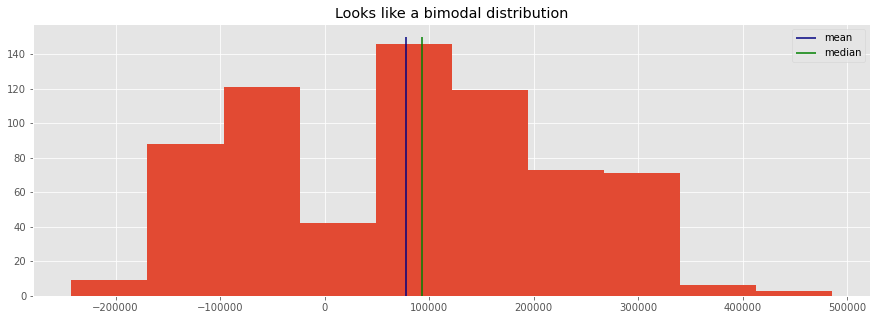

In [4]:
train.target.hist(figsize=(15,5))
plt.title('Looks like a bimodal distribution')
plt.vlines(train.target.mean(), 0, 150, color='navy', label='mean')
plt.vlines(train.target.median(), 0, 150, color='green', label='median')
plt.legend()

In [5]:
train.target.mean(),train.target.median()

(78097.21397985356, 92688.35855527742)

It's looks like a bimodal distribution in the range of ~(-200,000 - 500,000)

Maybe we have some outliers in both sides because the mean is not similar to the median, probably we have some bias.

C:\Users\serch\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([  1.,   3.,  12.,  22.,  49.,  71., 104.,  78., 102.,  10.]),
 array([ 9.41618874,  9.7839261 , 10.15166346, 10.51940082, 10.88713818,
        11.25487554, 11.6226129 , 11.99035026, 12.35808762, 12.72582498,
        13.09356234]),
 <BarContainer object of 10 artists>)

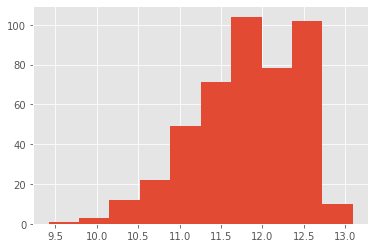

In [6]:
plt.hist(np.log(train.target))

### Analysis in numerical variables

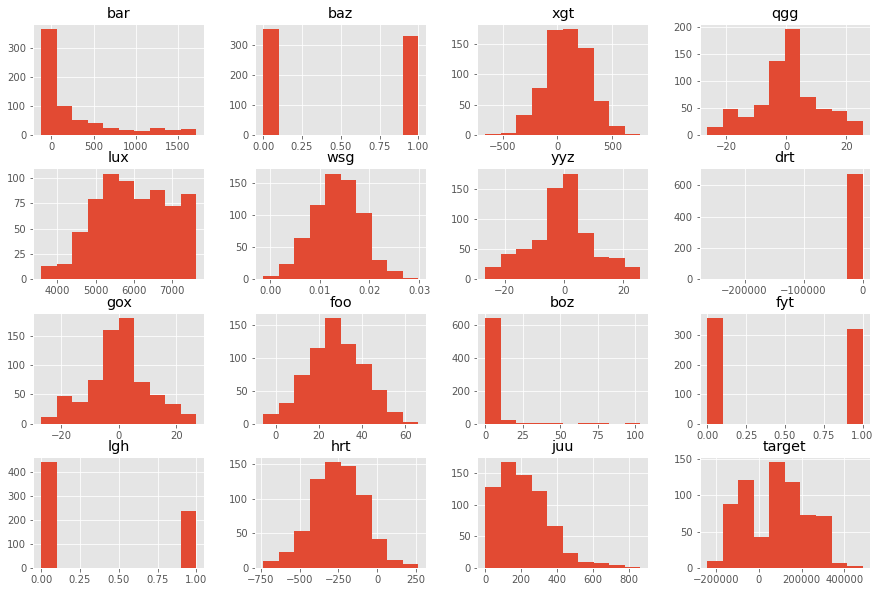

In [7]:
train.hist(figsize=(15,10));

The numerical variables:

- baz
- drt
- fyt
- lgh

Some variables distribute as a normal distribution:

- xgt
- qgg
- wsg
- yyz
- gox
- foo
- hrt

It's seems to be categorical features in the range of 0 or 1 lets find out.

In [8]:
for col in train.columns:
    print(col,train[col].nunique())

image 678
image class 10
date 505
bar 628
baz 2
xgt 678
qgg 678
lux 665
wsg 678
yyz 678
drt 678
gox 678
foo 678
boz 678
fyt 2
lgh 2
hrt 678
juu 678
target 678


In [9]:
for i in train[['baz','fyt','lgh']]:
    print(train[i].unique())

[1 0]
[1 0]
[0 1]


The categorical features are baz, fyt and lgh

With this features lets find if it's hace a relation between the values of the target feature

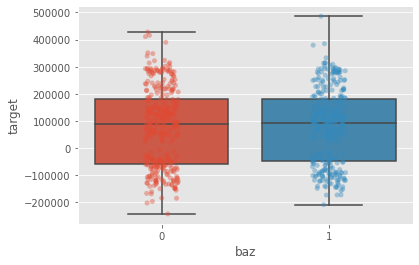

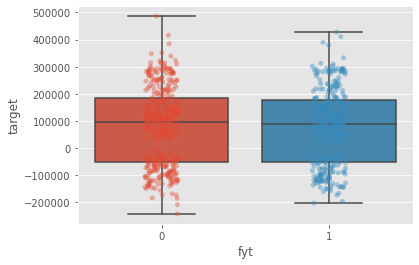

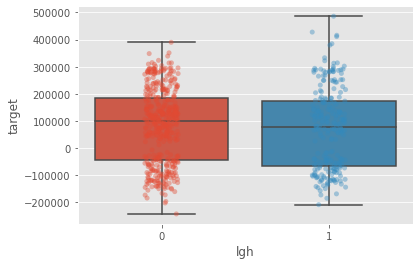

In [10]:
temp = train[['baz','fyt','lgh','target']]
for i in temp.columns[:-1]:
    sns.boxplot(y='target',x=i, data=temp)
    sns.stripplot(y='target',x=i, data=temp, alpha=0.4)
    plt.show()

This variables don't show different by the target variable

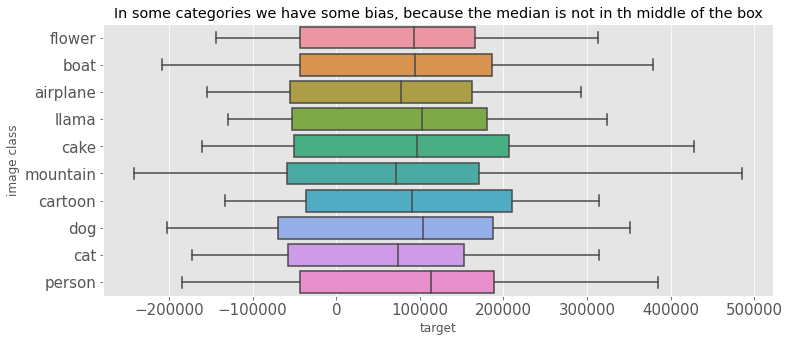

In [11]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train, y='image class', x='target')
plt.title('In some categories we have some bias, because the median is not in th middle of the box')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

Text(0.5, 1.0, 'To many categories to show differences')

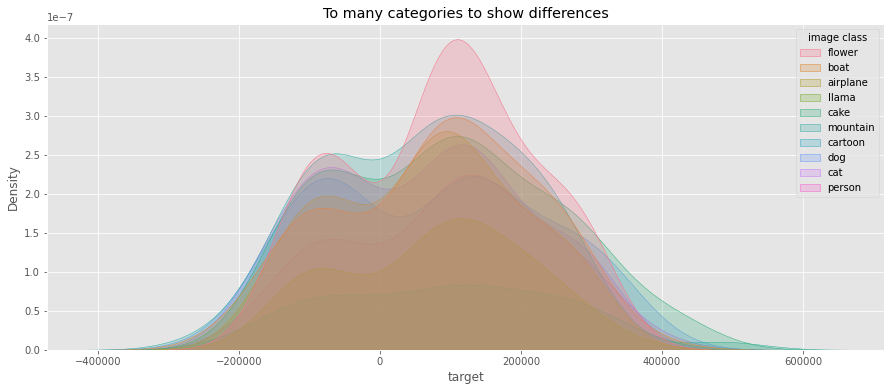

In [12]:
plt.figure(figsize=(15,6))
sns.kdeplot(hue='image class', x='target', data=train, shade=True)
plt.title('To many categories to show differences')

## Analysis of the feature date

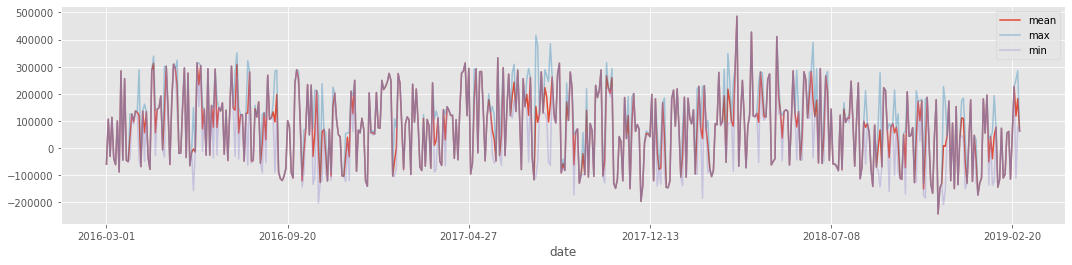

In [13]:
train.groupby('date').target.mean().plot(figsize=(18,4), label='mean')
train.groupby('date').target.max().plot(figsize=(18,4), label='max', alpha=0.4)
train.groupby('date').target.min().plot(figsize=(18,4), label='min', alpha=0.4)
plt.legend()

I don't see a trend, but It's like that have some times a seasonal effect, let's see by month or day of the week.

In [14]:
train['date'] = pd.to_datetime(train.date)
train['month'] = train.date.dt.month
train['dayofweek'] = train.date.dt.day_name()

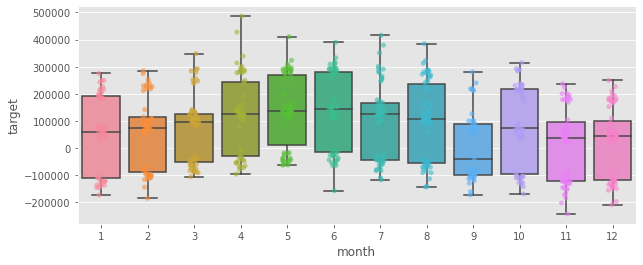

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(y='target',x='month', data=train)
sns.stripplot(y='target',x='month', data=train, alpha=0.6)
plt.show()

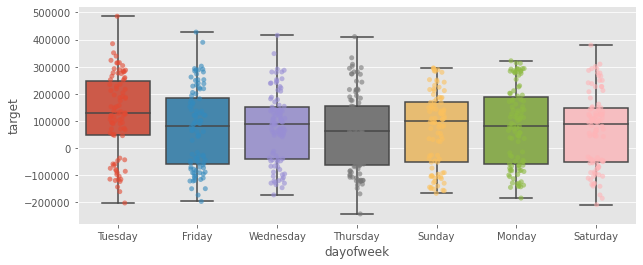

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(y='target',x='dayofweek', data=train)
sns.stripplot(y='target',x='dayofweek', data=train, alpha=0.6)
plt.show()

We see that the variables of the date like the month or the week day it can be helpfully to predict the target variable

### For the numerical continuous variables first we have to calculate the correlation to see if we have some interesting relationship between the variables and the target

In [17]:
train_num = train.select_dtypes(include='number').drop(['baz','fyt','lgh', 'month'], axis=1)
train_num.head()

bar         xgt        qgg          lux       wsg        yyz  \
0   -13.797746  132.244709 -14.888019  7059.592259  0.018760 -10.131641   
1  1370.968441  -53.010396  -0.249638  5404.074707  0.014199  -0.840672   
2  1240.615863  318.103170  25.234516  6435.785062  0.014366  -4.984576   
3  1258.368516  221.068821  -5.604373  4915.487849  0.021967   6.189880   
4   307.458019  259.110856   2.896887  5285.831301  0.014830  -7.544632   

         drt        gox        foo       boz         hrt         juu  \
0  -3.314482 -19.637941  24.774895  0.077676 -144.078606  367.977834   
1 -57.505186  -0.477005  43.993301  4.266039 -169.232629  215.094104   
2  -0.222097  -9.078957   2.444880  1.035487 -220.349351  220.027026   
3  -0.732725   2.324312  19.290565  0.206948 -246.892243  495.729658   
4 -22.701896   3.066921  11.171308  0.530466 -199.510487  234.047119   

          target  
0  134340.064080  
1  167657.624550  
2  157211.302698  
3  -47320.604867  
4  -85209.683794

<AxesSubplot:>

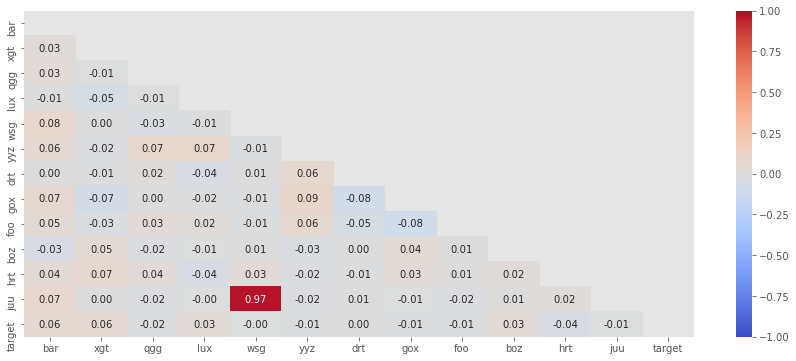

In [18]:
t_corr = train_num.corr()
mask = np.triu(np.ones_like(t_corr))
plt.figure(figsize=(15,6))
sns.heatmap(t_corr, vmin=-1, vmax=1, cmap='coolwarm',
            annot=True,fmt='.2f', mask=mask)

We only see a strong correlation between juu and wsg, but why?

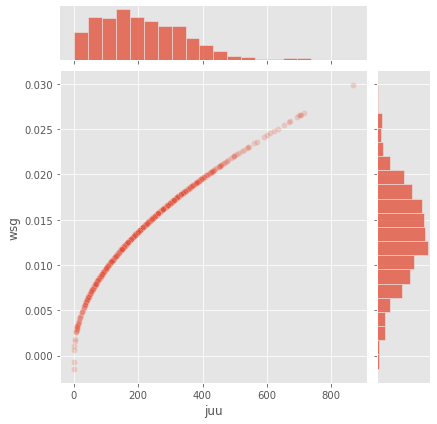

In [19]:
sns.jointplot(data=train, x='juu', y='wsg', alpha=0.2)

We have a logarithm relationship between this two variables, if we use a regression model we have to drop one or not if the penalization coefficient is the sufficient high to drop the variable itself.

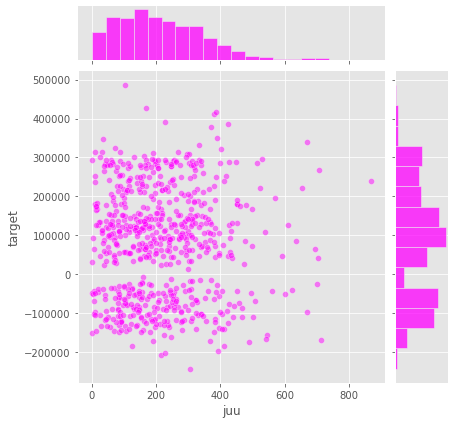

In [20]:
sns.jointplot(data=train, x='juu', y='target', alpha=0.5, color='magenta')

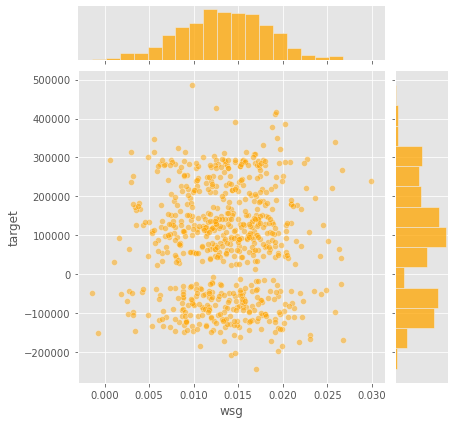

In [21]:
sns.jointplot(data=train, x='wsg', y='target', alpha=0.5, color='orange')

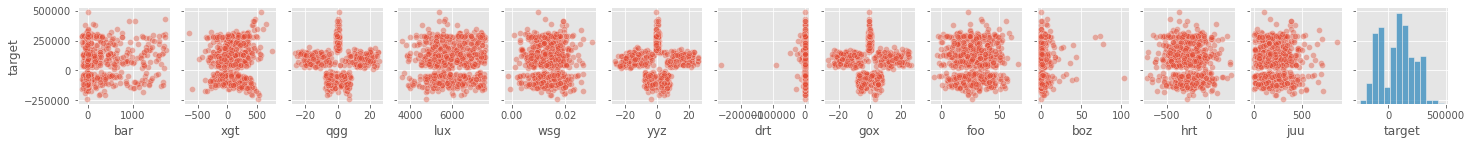

In [22]:
sns.pairplot(train_num, y_vars="target", x_vars=train_num.columns,
             height=2, aspect=0.8, plot_kws=dict(alpha=0.4));

Very interesting distribution we have in the scatter plot. For some variables probably the models like trees it will have a good work, also we have to clean some outliers to don't have overfitting.

Now we have to clean the data of the outliers using the Tukey Method

### Tukey's test for outliers
When the data distribution is non-normal, a very simple way to eliminate outliers analytically is by applying the Tukey test. It says that anyone outside the following range is considered an outlier:

- Outlier: $Q1−1.5⋅IQR> x> Q3 + 1.5⋅IQR$
- Extreme outlier: $Q1−3⋅IQR> x> Q3 + 3⋅IQR $

In [23]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [24]:
nrows = train.shape[0]
for i in train_num.columns:
    num_rows = tukey_outliers(train, i, extreme=True).shape[0]
    print('number of outliers in ',i,' ', nrows-num_rows)

number of outliers in  bar   14
number of outliers in  xgt   0
number of outliers in  qgg   0
number of outliers in  lux   0
number of outliers in  wsg   0
number of outliers in  yyz   0
number of outliers in  drt   78
number of outliers in  gox   0
number of outliers in  foo   0
number of outliers in  boz   42
number of outliers in  hrt   0
number of outliers in  juu   0
number of outliers in  target   0


We detect outliers in the features bar, drt and boz. As we have little data, we will replace the value according to how the data is distributed in each variable.

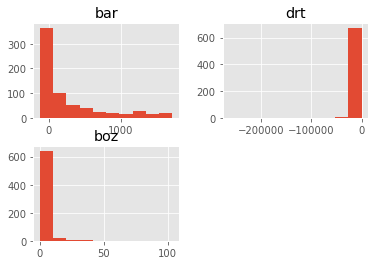

In [25]:
train[['bar','drt','boz']].hist();

For all the variables I will replace with the median

In [26]:
def tukey_outliers_vis(df,column,extreme=False):
    "Return the index of the outliers"
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))].index

In [27]:
for i in train[['bar','drt','boz']]:
    idx = tukey_outliers_vis(train,i,extreme=True)
    median_value = train[i].median()
    train.at[idx,i] = median_value
    print(i,len(idx), median_value)

bar 14 29.902257602081555
drt 78 -21.629013540223898
boz 42 0.9510862512468798


In [28]:
# Update the data
train_num = train.select_dtypes(include='number').drop(['baz','fyt','lgh', 'month'], axis=1)
train_num.head()

bar         xgt        qgg          lux       wsg        yyz  \
0   -13.797746  132.244709 -14.888019  7059.592259  0.018760 -10.131641   
1  1370.968441  -53.010396  -0.249638  5404.074707  0.014199  -0.840672   
2  1240.615863  318.103170  25.234516  6435.785062  0.014366  -4.984576   
3  1258.368516  221.068821  -5.604373  4915.487849  0.021967   6.189880   
4   307.458019  259.110856   2.896887  5285.831301  0.014830  -7.544632   

         drt        gox        foo       boz         hrt         juu  \
0  -3.314482 -19.637941  24.774895  0.077676 -144.078606  367.977834   
1 -57.505186  -0.477005  43.993301  4.266039 -169.232629  215.094104   
2  -0.222097  -9.078957   2.444880  1.035487 -220.349351  220.027026   
3  -0.732725   2.324312  19.290565  0.206948 -246.892243  495.729658   
4 -22.701896   3.066921  11.171308  0.530466 -199.510487  234.047119   

          target  
0  134340.064080  
1  167657.624550  
2  157211.302698  
3  -47320.604867  
4  -85209.683794

In [29]:
train_num_cols = train_num.drop('target',1).columns

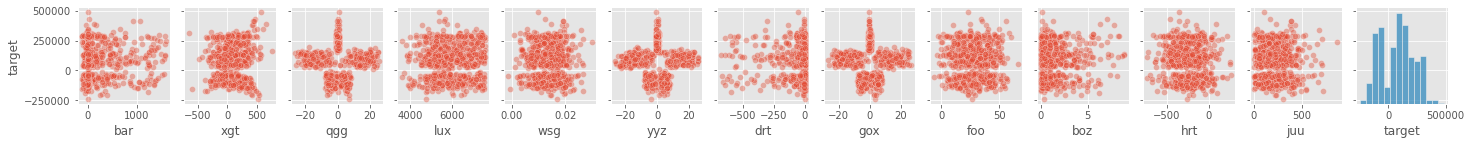

In [30]:
sns.pairplot(train_num, y_vars="target", x_vars=train_num.columns,
             height=2, aspect=0.8, plot_kws=dict(alpha=0.4));

Looks better.

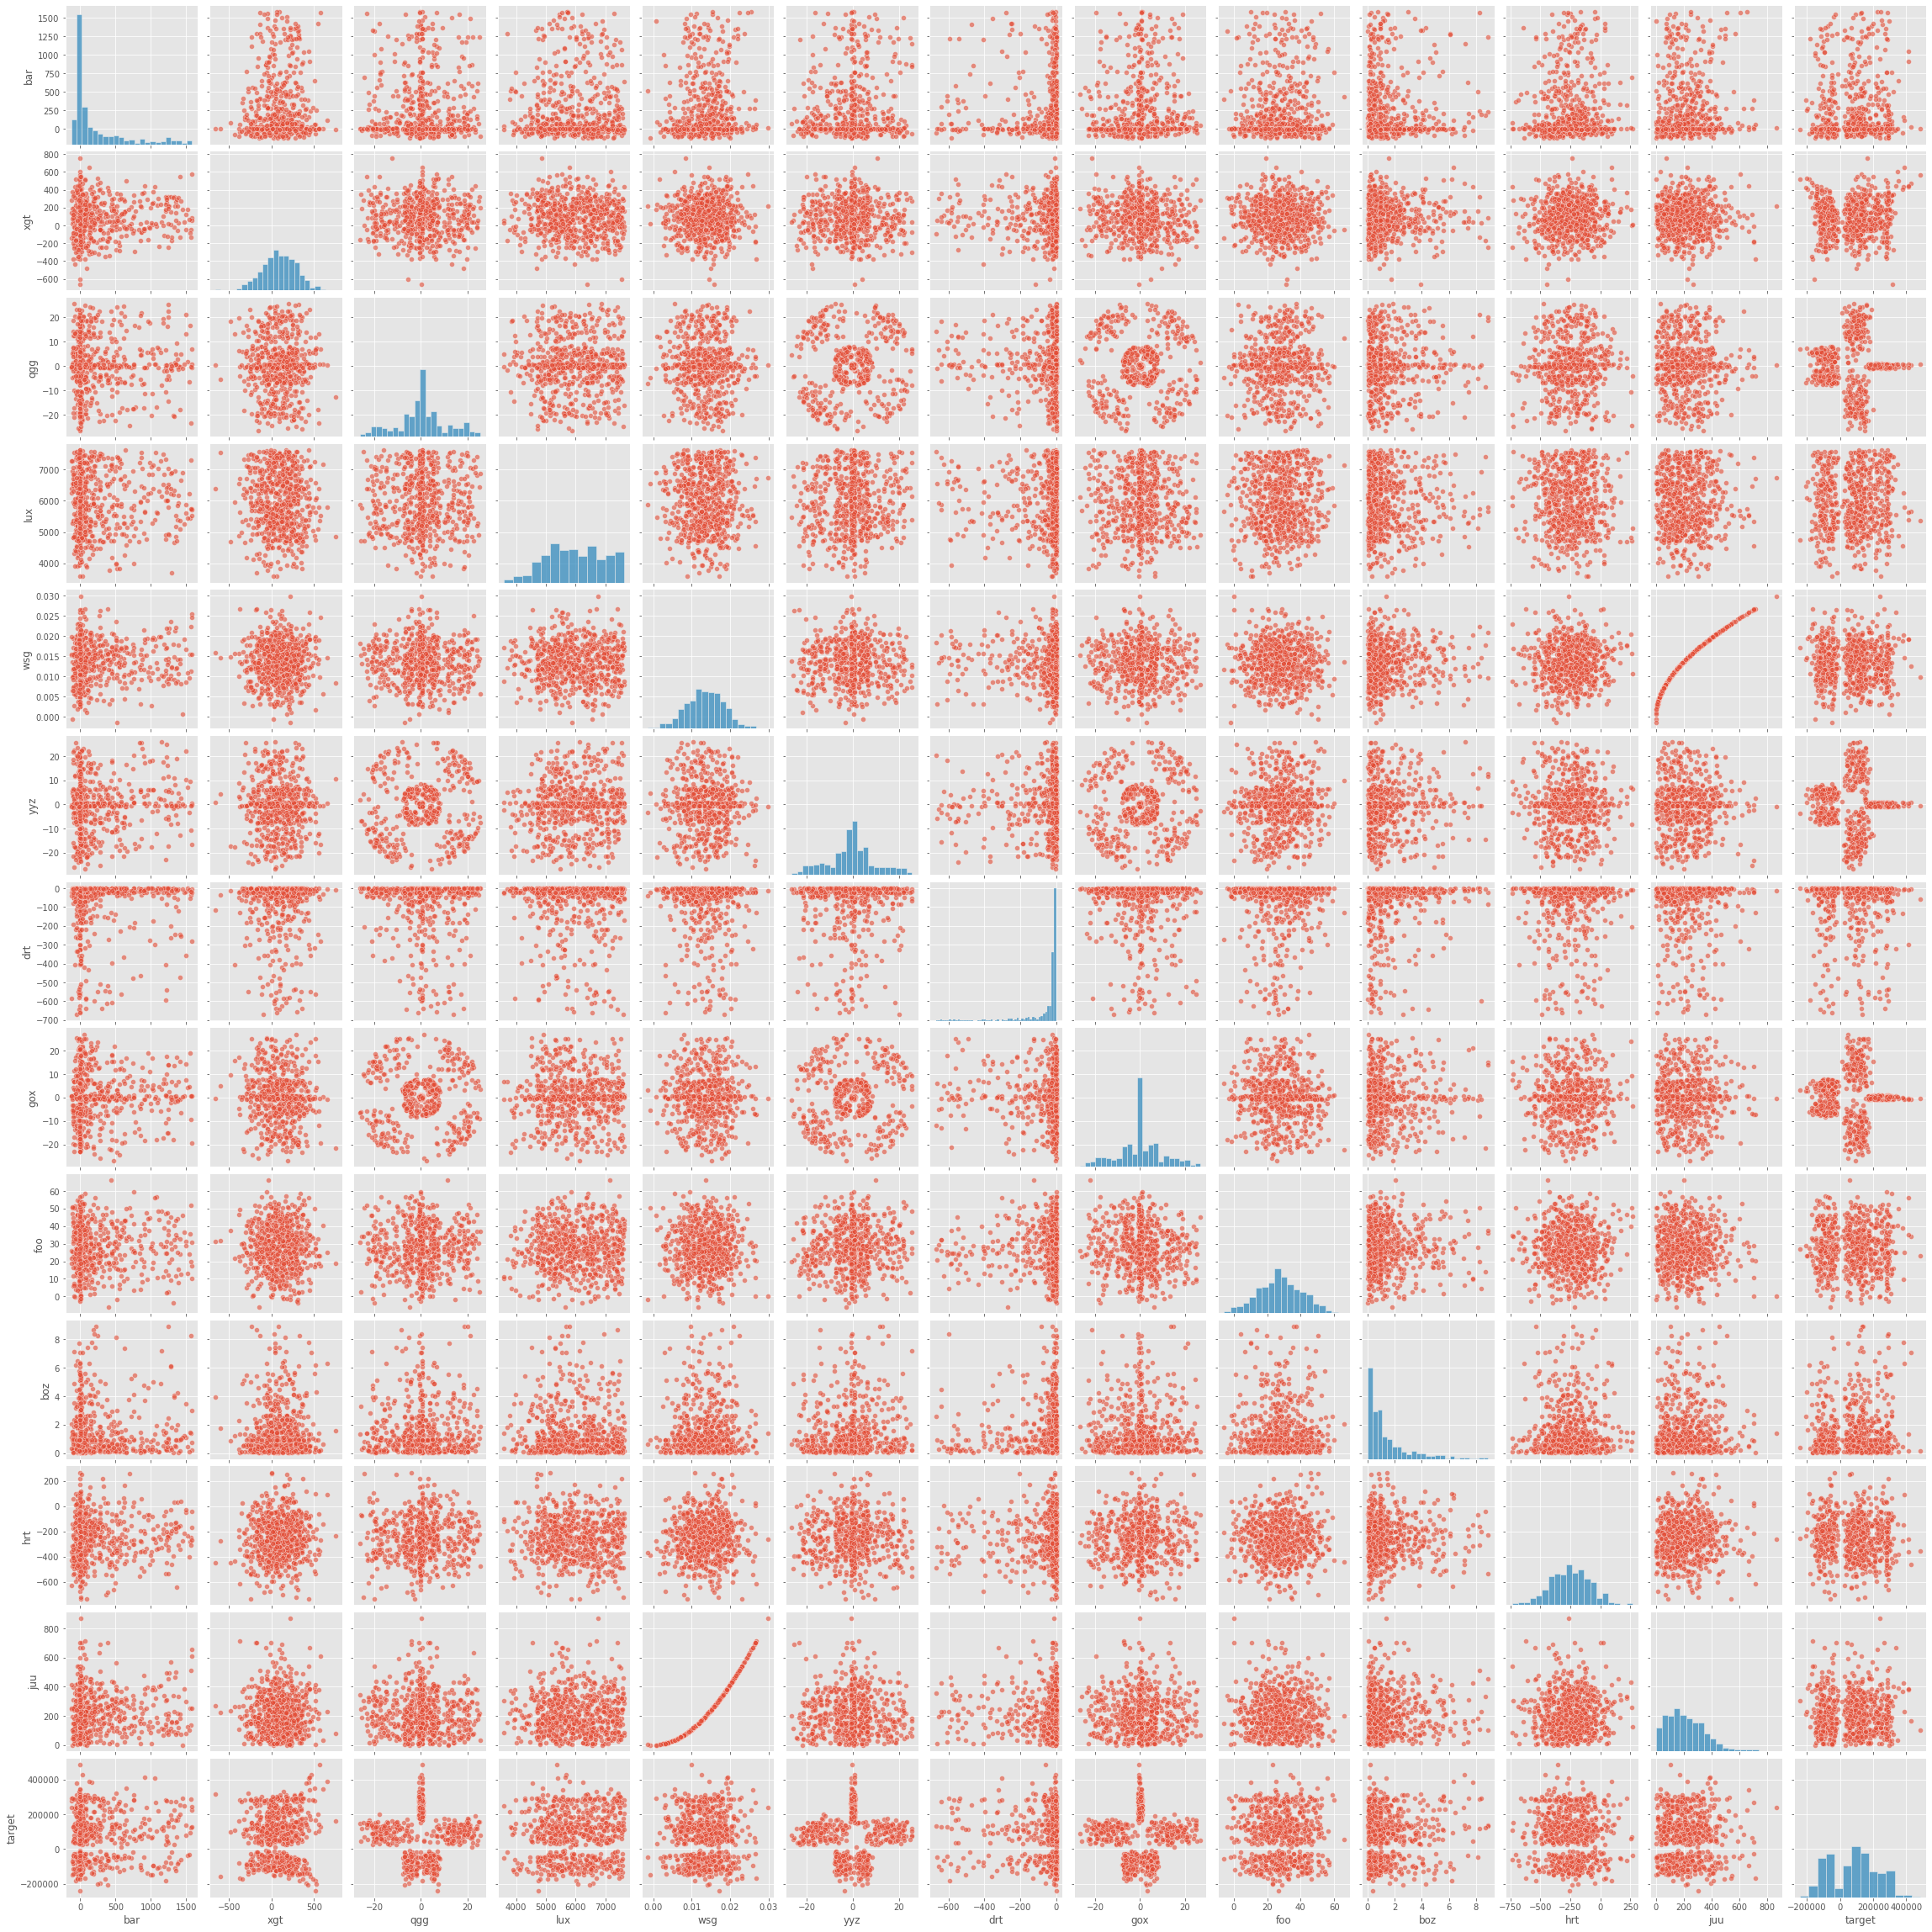

In [31]:
sns.pairplot(train_num, plot_kws=dict(alpha=0.6))

Some feature present patterns like if they are clustered. We will do clustering to create some features

## Feature Engineering


Features we build:

- Date features like month and weekday (they have already created).
- Dummie variables in the category columns like image class
- Polynomial features
- etc

In [32]:
# createing dummie cols and left one out
train = pd.get_dummies(train, columns=['image class', 'month', 'dayofweek'], drop_first=True)
train.head(2)

image       date          bar  baz         xgt  \
0  training-img/flower/flower_79.jpg 2016-04-05   -13.797746    1  132.244709   
1      training-img/boat/boat_10.jpg 2017-12-29  1370.968441    0  -53.010396   

         qgg          lux       wsg        yyz        drt  ...  month_9  \
0 -14.888019  7059.592259  0.018760 -10.131641  -3.314482  ...        0   
1  -0.249638  5404.074707  0.014199  -0.840672 -57.505186  ...        0   

   month_10  month_11  month_12  dayofweek_Monday  dayofweek_Saturday  \
0         0         0         0                 0                   0   
1         0         0         1                 0                   0   

   dayofweek_Sunday  dayofweek_Thursday  dayofweek_Tuesday  \
0                 0                   0                  1   
1                 0                   0                  0   

   dayofweek_Wednesday  
0                    0  
1                    0  

[2 rows x 44 columns]

Polynomial features for the numeric cols

In [33]:
pf = PolynomialFeatures(2)
train_poli = pf.fit_transform(train[train_num_cols])

In [34]:
train_poli = pd.DataFrame(train_poli, columns = pf.get_feature_names(train_num_cols))

In [35]:
train_poli = train_poli.drop(train_num_cols.tolist() + ['1'],1)

In [36]:
train = pd.concat([train,train_poli],1).drop(['image','date'], 1)
train.head(2)

bar  baz         xgt        qgg          lux       wsg        yyz  \
0   -13.797746    1  132.244709 -14.888019  7059.592259  0.018760 -10.131641   
1  1370.968441    0  -53.010396  -0.249638  5404.074707  0.014199  -0.840672   

         drt        gox        foo  ...        foo^2     foo boz      foo hrt  \
0  -3.314482 -19.637941  24.774895  ...   613.795416    1.924409 -3569.532317   
1 -57.505186  -0.477005  43.993301  ...  1935.410508  187.677137 -7445.101946   

       foo juu      boz^2     boz hrt     boz juu         hrt^2       hrt juu  \
0  9116.612160   0.006034  -11.191416   28.582959  20758.644710 -53017.733405   
1  9462.699611  18.199089 -721.952999  917.599841  28639.682768 -36400.940773   

           juu^2  
0  135407.686515  
1   46265.473674  

[2 rows x 120 columns]

Time to try the models

### Training the model

We will train different models for the regression like

- Ridge Regression
- Lasso Regression

In this two models we tuning the penalization coefficient in the range from [0.00001,10000]

- Decision Tree

The tuning was in the max_depth

- Random Forest

The tuning was in number of trees

- GBM

The tuning was in number of trees and the learning rate

And also make a feature selection with the backward elimination in all models keeping the half of the variables

In [37]:
x_cols = [col for col in train.columns if col != 'target']
x_cols[:5]

['bar', 'baz', 'xgt', 'qgg', 'lux']

In [38]:
# Creating the subsets
X_train, X_test, y_train, y_test = train_test_split(train[x_cols], train.target, 
                                                    test_size=0.2, random_state=8)

For the Regressions we have to standardize the features. But only the numerical so lets do it.

In [39]:
cat_cols = ['image class_boat', 'image class_cake', 'image class_cartoon',
 'image class_cat', 'image class_dog', 'image class_flower', 'image class_llama',
 'image class_mountain', 'image class_person', 
 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
 'month_9', 'month_10', 'month_11', 'month_12',
 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'baz','baz','fyt','lgh']
numeric_cols = [col for col in X_train.columns if col not in cat_cols]

In [40]:
def stand_feat(df_temp):
    """Standarization in the numeric columns
    and then concat the categorical features"""
    ss = StandardScaler()
    idx = df_temp.index
    df_temp_ss = pd.DataFrame(ss.fit_transform(df_temp[numeric_cols]), columns=numeric_cols, index=idx)
    df_temp_all = pd.concat([df_temp_ss, df_temp[cat_cols]],1)
    return df_temp_all

We have to standardize the features but if we do cross validation it will have data leakage, so we create a Pipeline to avoid and fit the StadardScaler for each subset in the train set.

To use our own standard scaler we use function transformer method of sklearn to use it in the pipeline.

Also this process we have to repeat for the other models, then we will create a function to apply many times.

In [41]:
def grid_fit_cv(model, param_grid, stand=False, cv=10):
    
    def stand_feat(df_temp):
        ss = StandardScaler()
        idx = df_temp.index
        df_temp_ss = pd.DataFrame(ss.fit_transform(df_temp[numeric_cols]), columns=numeric_cols, index=idx)
        df_temp_all = pd.concat([df_temp_ss, df_temp[cat_cols]],1)
        
        return df_temp_all
    
    print('Preparing the data')
    rfe = RFE(estimator=model) # n_features_to_select was arbitrary
    
    if stand:
        transformer = FunctionTransformer(stand_feat)
        pipe = Pipeline(steps=[('stand', transformer), ('rfe', rfe), ('model',model)])
    else:
        print('Ok, not necesary')
        pipe = Pipeline(steps=[('rfe', rfe), ('model',model)])
    
    print('Time to create the GridSearch with Recursive Feature Elmination')   
    clf = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=1, cv=cv, scoring='neg_root_mean_squared_error')
   
    clf.fit(X_train, y=y_train)
    print(clf.best_score_, clf.best_params_)
    
    y_pred = clf.predict(X_test)
    rmse_error = mean_squared_error(y_test, y_pred, squared=False)
    print('RMSE: %i' %rmse_error)
    
    return clf

In [178]:
%%time

import warnings # Bad Practice but its look ugly... BTW I check and it is in the only chunk that I get Warnings
warnings.filterwarnings("ignore")

param_grid = {'model__alpha':np.logspace(-5,5,20)}
lasso_model = grid_fit_cv(Lasso(), param_grid, stand=True)

Preparing the data
Time to create the GridSearch with Recursive Feature Elmination
Fitting 10 folds for each of 20 candidates, totalling 200 fits
-139487.7489061521 {'model__alpha': 2636.6508987303555}
RMSE: 136778
Wall time: 1min 21s


In [43]:
%%time

param_grid = {'model__alpha':np.logspace(-5,5,20)}
ridge_model = grid_fit_cv(Ridge(), param_grid, stand=True)

Preparing the data
Time to create the GridSearch with Recursive Feature Elmination
Fitting 10 folds for each of 20 candidates, totalling 200 fits
-140485.72402591954 {'model__alpha': 69.51927961775606}
RMSE: 137741
Wall time: 4.53 s


In [44]:
%%time

param_grid = {'model__max_depth':np.arange(10,18).astype(int)}
dt_model = grid_fit_cv(DecisionTreeRegressor(), param_grid)

Preparing the data
Ok, not necesary
Time to create the GridSearch with Recursive Feature Elmination
Fitting 10 folds for each of 8 candidates, totalling 80 fits
-45105.65576248428 {'model__max_depth': 11}
RMSE: 53661
Wall time: 30.1 s


In [46]:
%%time

param_grid = {'model__n_estimators': np.linspace(10,500,3).astype(int)}
rf_model = grid_fit_cv(RandomForestRegressor(max_depth=11), param_grid, cv=3)

Preparing the data
Ok, not necesary
Time to create the GridSearch with Recursive Feature Elmination
Fitting 3 folds for each of 3 candidates, totalling 9 fits
-43451.9620796263 {'model__n_estimators': 500}
RMSE: 54270
Wall time: 3min 56s


In [47]:
%%time

param_grid = {'model__n_estimators': np.linspace(10,500,3).astype(int),
              'model__learning_rate':np.linspace(1e-5,1,3)}
gbm_model = grid_fit_cv(GradientBoostingRegressor(max_depth=11), param_grid, cv=3)

Preparing the data
Ok, not necesary
Time to create the GridSearch with Recursive Feature Elmination
Fitting 3 folds for each of 9 candidates, totalling 27 fits
-46085.09020566407 {'model__learning_rate': 0.500005, 'model__n_estimators': 10}
RMSE: 56894
Wall time: 10min 31s


For the moment the best model was the Decision Tree, we have save it as a pickle to future predictions

In [49]:
pickle.dump(dt_model, open('best_model_dt.pkl','wb'))

We interpret the model and the evaluation

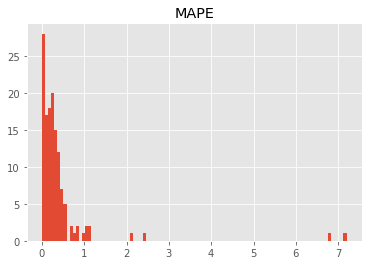

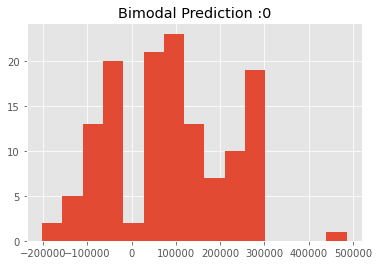

residuo 40.21892246997521
R^2: 0.8471121846455814
target average: 79424.41644541235


In [155]:
y_pred = dt_model.predict(X_test)


res = abs((y_test - y_pred)/y_test)

plt.hist(res,bins=100)
plt.title('MAPE')
plt.show()

plt.hist(y_pred, bins=15)
plt.title('Bimodal Prediction :0')
plt.show()
print('residuo', res.mean()*100)
print('R^2:',r2_score(y_test,y_pred))
print('target average:', y_test.mean())


For the $R^2$ it not a bad result, however we get an error in the MAPE of 40%

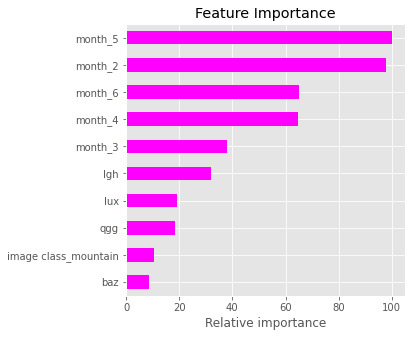

In [80]:
dt_model_vis = dt_model.best_estimator_.steps[1][1]
rf_vis = dt_model.best_estimator_.steps[0][1]
selected_vars = np.array(x_cols)[rf_vis.support_]

f_imp = pd.DataFrame(dt_model_vis.feature_importances_,
                     index=selected_vars, columns=['imp']).head(10)
f_imp['imp_rel'] = (f_imp/f_imp.max()*100)

f_imp.sort_values('imp_rel',ascending=True).imp_rel.plot.barh(figsize=(5,5),
                title='Feature Importance',color='magenta')
plt.xlabel('Relative importance');

We get that the date features have a "good" performance for the model, helping to predict the values. Possibly capturing seasonal effects in the model.

In [86]:
perm = PermutationImportance(dt_model, 
                             scoring='neg_root_mean_squared_error',
                             random_state=8).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.values)

The Permutance Importance score the importance of a feature like the method of Backward Elimination we train n-models and we leave out the feature if the performance is worst, then the feature have a an importance by the effect of how much we get a bigger error.

In this model we see that the quadratic variables help to the performance for the model and maybe will help if we use with a higher grade the polynomial features. Also the month features are in the top 6.

In [89]:
f_imp_sort = f_imp.sort_values('imp_rel', ascending=False)
names = list(f_imp_sort.index)
feat = []
lista_casv = x_cols

for i in f_imp_sort.index:
    if i in lista_casv:
        feat.append(lista_casv.index(i))

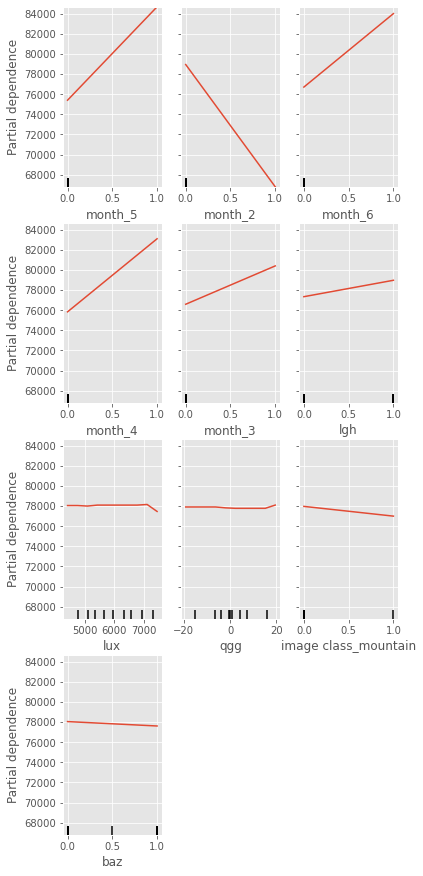

In [103]:
#fig = plt.figure()
plot_partial_dependence(dt_model,X_train, feat, feature_names=x_cols,
                        grid_resolution=10,response_method='auto')
fig.suptitle('Partial dependence')
plt.subplots_adjust(top=3)  # tight_layout causes overlap with suptitle
fig.set_size_inches(20, 20.5)

The marginal effects show us how the value of the feature effects in the average prediction and we see in the chart the top 10 of feature that we get in the chart of feature importance of the Decision Tree. The first chart of the feature month_5 we see that if we are in May the model will predict a higher value and in the feature of month_2 we see that if we are in February the model will predict a lower value. Also in the numerical values like lux or qgg at the highest values we see a non-linear effect to predict the target value.

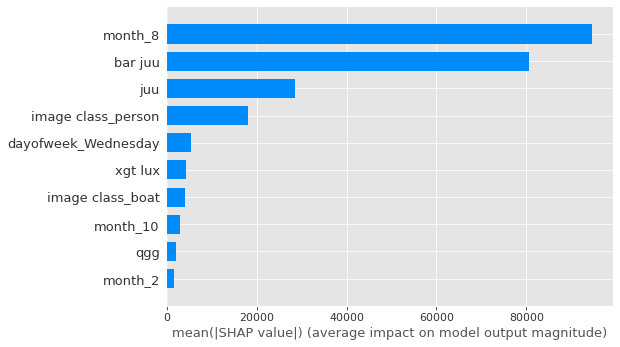

In [114]:
shap_values = shap.TreeExplainer(dt_model_vis, feature_perturbation="tree_path_dependent").shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", max_display=10)

The shap values are values that help to interpret the model by calculate the interactions effect. Here we see the top 10 by the shap value.

Variables like month_8, help by the interaction of the others to predict the values. Also the juu feature it's looks that is important by interaction with other feature and alone.

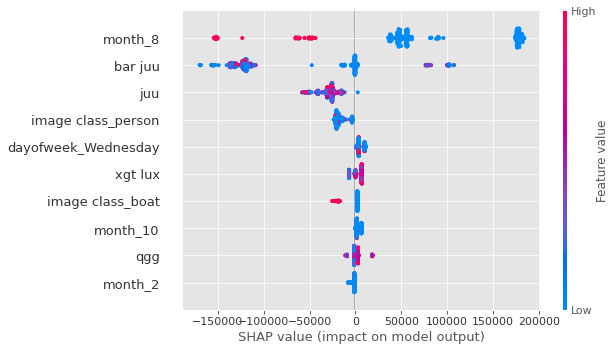

In [156]:
f = plt.figure()
shap.summary_plot(shap_values, X_train,  max_display=10)

In this chart that in the x axis are the shap value (if it is positive the shap value the prediction will be to and vice versa). In the y axis we see the feature sorted by the importance of the last chart, and the color show the value of the feature.

We see that in average the impact of the feature month_8 when the value is 1 the model predict a lower value or inclusive a negative value of the target feature.

For the other feature we don't see a clear effect of the variable depending in his value.

In [134]:
# Generamos un cachito de data aleatoria
X_output = X_train.copy()
X_output.loc[:,'predict'] = np.round(dt_model.predict(X_output),2)

# y seleccionamos algunos aleatoreamente.

S = X_output.sample(10)
S.head()

bar  baz         xgt        qgg          lux       wsg        yyz  \
86   63.913622    0  506.993870   0.676144  7243.970297  0.015201   0.535674   
493   0.440281    0  319.530222 -18.979206  6652.585959  0.016902  -5.143744   
520  16.704797    0  183.418736  13.790734  6989.068407  0.014469  22.333794   
617   8.271877    1  277.204203   5.442280  7025.226823  0.017202  -3.464208   
559  -0.048576    0  193.241200   0.864348  4417.686034  0.011635  -0.510571   

            drt        gox        foo  ...    foo boz      foo hrt  \
86  -318.550142   0.470281  16.791401  ...  94.129178 -8606.160880   
493   -0.126194 -18.930007  13.489100  ...  13.697755 -2668.624624   
520  -46.755447   7.364389  25.041526  ...  80.936779 -4053.462415   
617   -0.542112   5.588137  27.320782  ...  17.901188 -5383.808018   
559   -0.363767   0.143902  25.463292  ...   1.033091  -136.655944   

         foo juu      boz^2      boz hrt      boz juu          hrt^2  \
86   4122.947464  31.424954 -2873.160242  1376.442864  262690.907385   
493  4064.899861   1.031176  -200.895836   306.008364   39138.938175   
520  5587.206870  10.446486  -523.179197   721.139141   26201.774377   
617  8516.185801   0.429316  -129.117517   204.239965   38832.277888   
559  3710.343642   0.001646    -0.217740     5.911852      28.802352   

           hrt juu         juu^2    predict  
86  -125847.148999  60289.505521  277407.41  
493  -59617.176165  90810.018350   61558.11  
520  -36115.971678  49781.491571   47754.16  
617  -61425.461773  97163.688540  -78854.73  
559    -782.012271  21232.404358  283526.81  

[5 rows x 120 columns]

In [135]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(dt_model_vis, feature_perturbation="tree_path_dependent")
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In this chart we can interpret the result of the model in a row level, so we can see what feature help to predict a high value or a lower value.

In [142]:
shap_plot(4)

In this example we saw in red the feature and the value that help to get a higher prediction of 224,491 in the target value, the blue feature help to predict a lower or a negative value.

In this case we see that juu in that level helps to get a lower value, but the combination of not been in month 8 or 10, and also that the row was not in Wednesday help to get a higher result

In [149]:
shap_plot(1)

In this case we see that juu in that level helps to get a lower value and that the image class was a boat help to get a lower or negative prediction in the target value. A higher value in the multiplication of xgt and lux it's push to a higher value the prediction.

## Prediction

For time reasons we will not test more algorithms and now we generate the script to obtain the prediction in the test set.

In [166]:
# Get the image class from the column image
test['image class'] = test.image.str.split('/').str[1]

In [167]:
# adequate the features
test['date'] = pd.to_datetime(test.date)
test['month'] = test.date.dt.month
test['dayofweek'] = test.date.dt.day_name()

test = pd.get_dummies(test, columns=['image class', 'month', 'dayofweek'], drop_first=True)

pf = PolynomialFeatures(2)
test_poli = pf.fit_transform(test[train_num_cols])
test_poli = pd.DataFrame(test_poli, columns = pf.get_feature_names(train_num_cols))
test_poli = test_poli.drop(train_num_cols.tolist() + ['1'],1)

test = pd.concat([test,test_poli],1).drop(['image','date'], 1)
test.head(2)

bar  baz         xgt        qgg          lux       wsg        yyz  \
0  495.361007    0  331.966668  21.021535  5190.710171  0.015209 -12.344110   
1  127.415879    1  396.851851   5.630238  4767.268227  0.010817   5.499534   

         drt        gox        foo  ...       foo^2    foo boz      foo hrt  \
0  -4.587213 -11.226993  -7.996372  ...   63.941968 -44.083988  1912.562665   
1 -25.675941   3.239795  23.326502  ...  544.125675  89.041193 -4485.054413   

       foo juu      boz^2      boz hrt      boz juu         hrt^2  \
0 -1965.557917  30.393152 -1318.592327  1355.129238  57206.495815   
1  2945.133178  14.570777  -733.938161   481.944126  36968.873229   

        hrt juu         juu^2  
0 -58791.632198  60420.691168  
1 -24275.793575  15940.819999  

[2 rows x 122 columns]

In [169]:
# Not in the dataset test value
test['image class_flower'] = 0

In [172]:
# Make the prediction with the saved model
test["predicted target"] = dt_model.predict(test[x_cols])

In [176]:
# Write results
test.to_csv('Camposortega-answer.csv', index=False)

## Conclusions

This challenge with small data was very interesting. We make a little EDA to get intuition of the data and saw that have seasonal effects, and that kind of feature help us to get a better performance. I think that I have to try with a higher degree of Polynomial features or with some trigonometric transformation in some variables to capture the non-linear effects in the target variable. 

In the train and selection model we try several models and the Tree Regressor have the best performance. We apply the standardization in Regression models and in tree models we keep the original data only applying in both type of models a feature selection by backwards elimination and a GridSearch with a 10 or 3 cross-validation. Getting a Decision Tree as the best model and the result was a RMSE of  53,661 units. We don't optimze a lot of hyper parameters in complex models. But we give us time to interpret the model result and show in what features are the insights to get a better performance of the models or to create new features.

### In summary
If I have more time I suggest to try some feature engineering:

- target variable as log(target)
- Spectral clustering without target feature and put the prediction of the cluster as a categorical feature
- Polynomial features with higher degree 3 o 4.
- trigonometric transformation
- Features that have non-linear patrons with the target feature I will apply a PCA to unfolding 

The decision of the cluster was because in some scatter plots look as clusters in the center of the data. 
![cluster_comparison.png](cluster_comparison.png)

Try complex models like:

- Tuning more Hyper parameters
- light_gbm

